In [1031]:
import networkx as nx
import matplotlib.pyplot as plt
INF = 99999999

In [1032]:
class MaximumFlow:
    def __init__(self, nodes_num):
        self.nodes_num = nodes_num
        self.edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 
        self.parent = {}

        self.G = nx.DiGraph()
        self.original_edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 

    def add_edge(self, from_node, to_node, cap):
        self.edges[from_node][to_node] += cap
        self.original_edges[from_node][to_node] += cap

    
    # Bfs is used to find augmenting paths. Update the hashmap "parent" 
    # while bfs to find the path.
    def bfs(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)

        return visited[target],

    def maximumflow(self, source, target):
        maximum_flow = 0
        while self.bfs(source, target):
            new_flow = INF
            curr = target

            """
            Once we find a augmenting path. We try to find the minimum residual
            capacity on this path by backtracking
            """
            while curr != source:
                prev = self.parent[curr]
                new_flow = min(new_flow, self.edges[prev][curr])
                curr = prev
            maximum_flow += new_flow

            # If no augmenting paths are found. the function return maximum flow
            if new_flow == 0:
                return maximum_flow

            # We adjust the residual network
            curr = target
            while curr != source:
                prev = self.parent[curr]
                self.edges[prev][curr] -= new_flow
                self.edges[curr][prev] += new_flow 
                curr = prev
    
    def minimumcut(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)
        return visited
    
    def print_result(self, source, target):
        print(self.maximumflow(source, target))
        st = self.minimumcut(source, target)
        G = self.G
        for i in range(1, self.nodes_num + 1):
            G.add_node(i)

        edge_label = {}
        for i in range(1, self.nodes_num + 1):
            for j in range(1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    G.add_edge(i, j)
        
        pos = nx.planar_layout(G)
        self.pos = pos
        plt.figure()

        for i in range(1, self.nodes_num + 1):
            for j in range(1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    cap = self.original_edges[i][j]
                    flow = self.original_edges[i][j] - self.edges[i][j]
                    edge_label[(i, j)] = str(flow) + "/" + str(cap)
        
        color = []
        for i in range(1, self.nodes_num + 1):
            if st[i]:
                color.append('red')
            else:
                color.append('green')
        
        labels={node: node for node in G.nodes()}
        labels[source] = 's=' + str(source)
        labels[target] = 't=' + str(target)
        nx.draw(
            G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color=color, alpha=0.9,
            labels=labels

        )


        nx.draw_networkx_edge_labels(
            G, pos,
            edge_label,
            font_color='red',
        )

6


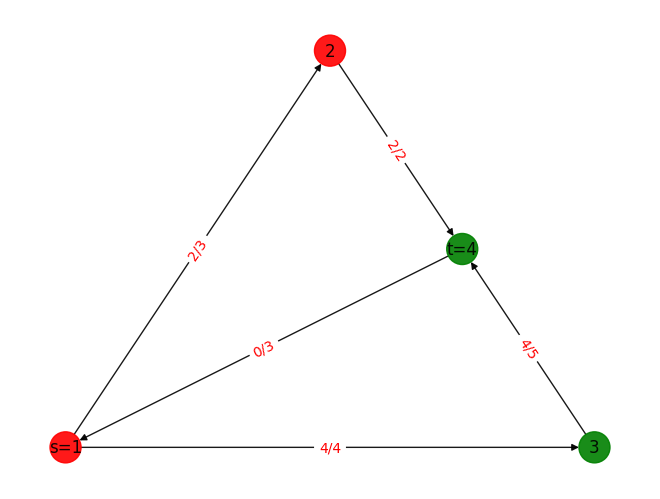

In [1033]:
solver = MaximumFlow(4)
solver.add_edge(1, 2, 3)
solver.add_edge(2, 4, 2)
solver.add_edge(1, 3, 4)
solver.add_edge(3, 4, 5)
solver.add_edge(4, 1, 3)
solver.print_result(1, 4)

7


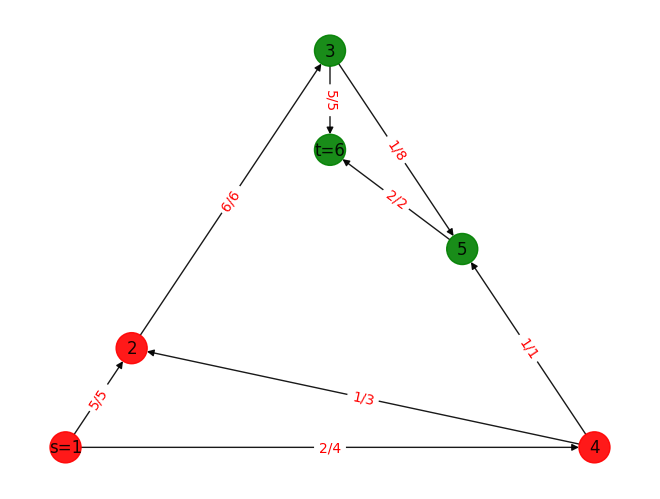

In [1034]:
maximumflow = MaximumFlow(6)
maximumflow.add_edge(1, 2, 5)
maximumflow.add_edge(1, 4, 4)
maximumflow.add_edge(4, 2, 3)
maximumflow.add_edge(2, 3, 6)
maximumflow.add_edge(4, 5, 1)
maximumflow.add_edge(3, 5, 8)
maximumflow.add_edge(5, 6, 2)
maximumflow.add_edge(3, 6, 5)
maximumflow.print_result(1, 6)


In [1035]:

class kthFlow:
    def __init__(self, nodes_num):
        self.nodes_num = nodes_num
        self.edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 
        self.parent = {}

        self.if_pos = -1
        self.G = nx.DiGraph()
        self.original_edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 

    def add_edge(self, from_node, to_node, cap):
        self.edges[from_node][to_node] += cap
        self.original_edges[from_node][to_node] += cap

    
    # Bfs is used to find augmenting paths. Update the hashmap "parent" 
    # while bfs to find the path.
    def bfs(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)

        return visited[target],

    def init(self):
        self.edges = self.original_edges


    def next(self, source, target):
        maximum_flow = 0
        self.bfs(source, target)
        new_flow = INF
        curr = target

        while curr != source:
            prev = self.parent[curr]
            new_flow = min(new_flow, self.edges[prev][curr])
            curr = prev
        maximum_flow += new_flow

        # If no augmenting paths are found. the function return maximum flow
        if new_flow == 0:
            return maximum_flow

        # We adjust the residual network
        curr = target
        while curr != source:
            prev = self.parent[curr]
            self.edges[prev][curr] -= new_flow
            self.edges[curr][prev] += new_flow 
            curr = prev
    
    def minimumcut(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)
        return visited
    
    def get_pos(self):
        return nx.spring_layout(self.G)

    def print_result(self, source, target):
        ##flow
        self.bfs(source, target)
        new_flow = INF
        curr = target

        while curr != source:
            prev = self.parent[curr]
            new_flow = min(new_flow, self.edges[prev][curr])
            curr = prev


        edge_label = {}
        for i in range(1, self.nodes_num + 1):
            for j in range(1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    cap = self.original_edges[i][j]
                    flow = self.original_edges[i][j] - self.edges[i][j]
                    edge_label[(i, j)] = str(flow) + "/" + str(cap)
        
        # We adjust the residual network
        
        ## flow
        if new_flow == 0:
            return

        G = self.G
        for i in range(1, self.nodes_num + 1):
            G.add_node(i)

        for i in range(1, self.nodes_num + 1):
            for j in range(1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    G.add_edge(i, j)
        plt.figure()

        curr = target
        while curr != source:
            prev = self.parent[curr]
            cap = self.original_edges[prev][curr]
            if self.original_edges[prev][curr] > 0:
                edge_label[(prev, curr)] = "(" + str(flow) + "+" + str(new_flow) + ")/" + str(cap)
            else:
                edge_label[(prev, curr)] = "(" + str(flow) + "-" + str(new_flow) + ")/" + str(cap)
            self.edges[prev][curr] -= new_flow
            self.edges[curr][prev] += new_flow 
            curr = prev

        color = []
        
        st = self.minimumcut(source, target)
        for i in range(1, self.nodes_num + 1):
            if st[i]:
                color.append('red')
            else:
                color.append('green')
        
        labels={node: node for node in G.nodes()}
        labels[source] = 's=' + str(source)
        
        labels[target] = 't=' + str(target)

        if self.if_pos == -1:
            self.pos = nx.spring_layout(G)
            pos = self.pos
            self.if_pos = 1
        else:
            pos = self.pos

        nx.draw(
            G, pos, edge_color = "black", width=1, linewidths=1,
            node_size=500, node_color=color, alpha=0.9,
            labels=labels

        )


        nx.draw_networkx_edge_labels(
            G, pos,
            edge_label,
            font_color='red',
        )

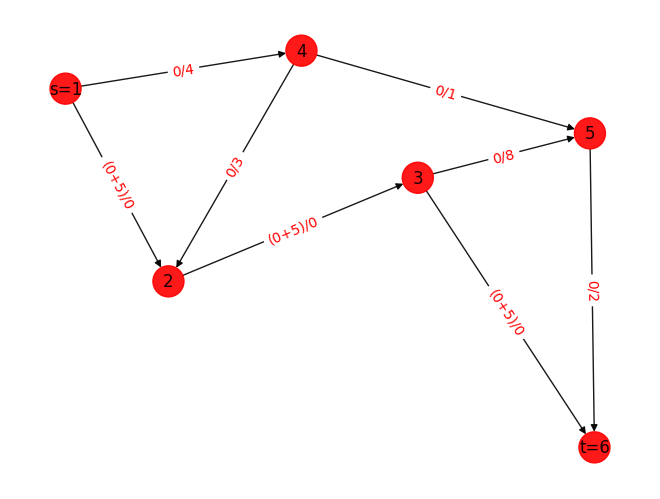

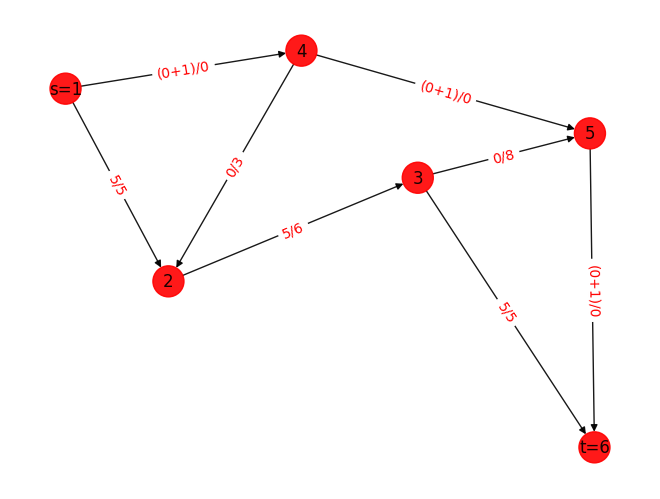

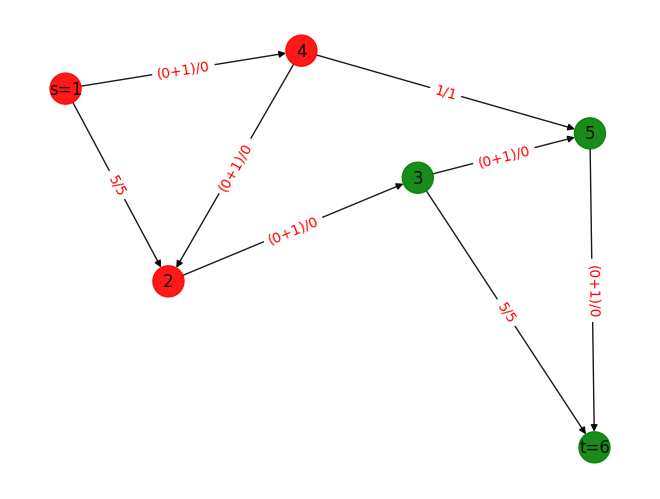

In [1036]:


maximumflow =kthFlow(6)
maximumflow.add_edge(1, 2, 5)
maximumflow.add_edge(1, 4, 4)
maximumflow.add_edge(4, 2, 3)
maximumflow.add_edge(2, 3, 6)
maximumflow.add_edge(4, 5, 1)
maximumflow.add_edge(3, 5, 8)
maximumflow.add_edge(5, 6, 2)
maximumflow.add_edge(3, 6, 5)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)
maximumflow.print_result(1, 6)

In [1037]:
class MaximumMatching:
    def __init__(self, set1_num, set2_num):
        self.set1_num = set1_num
        self.set2_num = set2_num
        self.nodes_num = set1_num + set2_num
        self.flow_solver = MaximumFlow(self.nodes_num + 1)
        # We add edges from 0 to every node in set1 with capacity 1
        # and edges from j from set2 to node nodes_num + 1 with capacity 1;
        for i in range(1, set1_num + 1):
            self.flow_solver.add_edge(0, i, 1)
        for i in range(set1_num + 1, self.nodes_num + 1):
            self.flow_solver.add_edge(i, self.nodes_num + 1, 1)

        # Please ignore the following line. It's just used to draw the graph
        self.original_edges = [[0 for x in range(self.nodes_num + 1)] for y in range(self.nodes_num + 1)] 
        
    
    def add_edge(self, a, b):
        self.flow_solver.add_edge(a, self.set1_num + b, 1)

        # Please ignore the following line. It's just used to draw the graph
        self.original_edges[a][self.set1_num + b] = 1

    def max_maching(self):
        # We find the maximum matching by find the flow from node "0" to node "nodes_num + 1"
        return self.flow_solver.maximumflow(0, self.nodes_num + 1)
    



    #Please ignore the following codes. They are just used to draw the pictures#
    ############################################################################
    ############################################################################
    def print_result(self):
        print(self.max_maching())
        G = nx.DiGraph()

        for i in range(1, self.set1_num + 1):
            G.add_node(i)

        for j in range(self.nodes_num, self.set1_num, -1):
            G.add_node(self.num2char(j))


        edge_label = {}

        visited_1 = [False for i in range(0, self.set1_num + 1)]
        visited_2 = [False for i in range(0, self.nodes_num + 1)]

        for i in range(1, self.set1_num + 1):
            for j in range(self.set1_num + 1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    if self.flow_solver.edges[i][j] == 0:
                        visited_1[i] = True
                        visited_2[j] = True
                        G.add_edge(i, self.num2char(j), color = 'r')
                        edge_label[i, self.num2char(j)] = '1/1'
                        G.add_edge('source', i, color = 'r')
                        edge_label[('source', i)] = '1/1'
                        G.add_edge(self.num2char(j), 'target', color = 'r')
                        edge_label[self.num2char(j), 'target'] = '1/1'
                    else:
                        G.add_edge(i, self.num2char(j), color = 'black')
                        edge_label[i, self.num2char(j)] = '0/1'



        for i in range(1, self.set1_num + 1):
            if visited_1[i] == False:
                G.add_edge('source', i, color = 'black')
                edge_label[('source', i)] = '0/1'

        for j in range(self.set1_num + 1, self.nodes_num + 1):
            if visited_2[j] == False:
                G.add_edge(self.num2char(j), 'target', color = 'black')
                edge_label[self.num2char(j), 'target'] = '0/1'

        m = self.set1_num
        n = self.set2_num
        pos = {}
        pos['source'] = (0, n / 4)
        pos['target'] = (2, m / 4)
        pos.update((m + 1 - i, (0.5, i - m/2)) for i in range(1, m + 1))
        pos.update((self.num2char(2 * m +  n + 1 - i), (1.5, i - m - n/2)) for i in range(m + 1, m + n + 1))

        colors = nx.get_edge_attributes(G, 'color').values()
        
        set1 = range(1, self.set1_num + 1)
        
        nx.draw(G, pos=pos, edge_color=colors, with_labels=True)
        nx.draw_networkx_edge_labels(
            G, pos,
            edge_label,
            font_color='red',
        )

   
    def num2char(self, i):
        return str(i - self.set1_num)



3


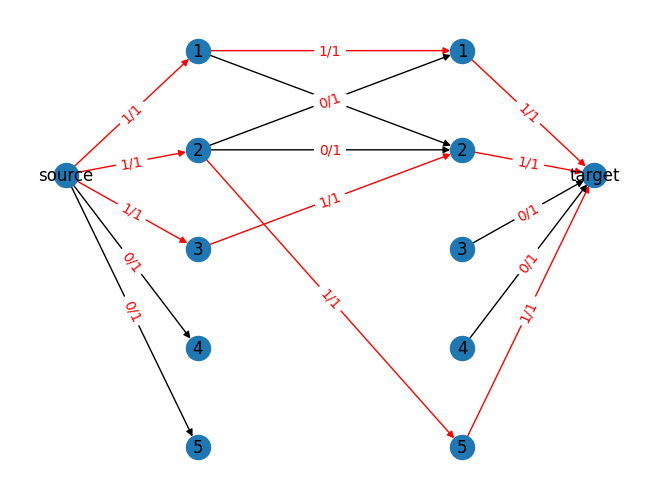

In [1038]:
maxmatch = MaximumMatching(5, 5)
maxmatch.add_edge(1,1)
maxmatch.add_edge(1,2)
maxmatch.add_edge(2,1)
maxmatch.add_edge(3,2)
maxmatch.add_edge(2,2)
maxmatch.add_edge(2,5)

maxmatch.print_result()
